### 426. Series Temporais Teórica
<h1>Séries Temporais</h1><h2>O que são</h2><ul><li>Observação de diferentes pontos ao longo do tempo</li><li>Exemplos:<ul><li>Temperatura diária</li><li>Preço da gasolina</li><li>Utilizando dados do presente e passado para prever valores futuros</li></ul></li></ul><h2>Aplicações</h2><ul><li>Varejo: prever quantidade de vendas</li><li>Mercado financeiro: prever preços de ações</li><li>Meteorologia: prever temperaturas e mudanças climáticas</li></ul><h2>Conceitos importantes</h2><h3>Tendência</h3><ul><li>Para onde a série está direcionada (subindo ou descendo)</li></ul><h3>Sazonalidade</h3><ul><li>Características e padrões que aparecem repetidamente ao longo do tempo</li><li>Ex: Períodos de alta de vendas no e-commerce</li></ul><h3>Média Móvel</h3><ul><li>Média de uma unidade durante determinado número de períodos</li><li>Bom indicador de tendência</li></ul><h2>Algoritmos</h2><h3>ARIMA</h3><ul><li>Previsão do futuro com base em dados do presente e passado</li><li>AR: Autoregressão - usa valores do passado (lag)</li><li>I: Integrado - remove tendência e torna série estacionária</li><li>MA: Média móvel - usa erros residuais para minimizar erros</li></ul><h3>SARIMA</h3><ul><li>Mesmo que ARIMA, mas considera sazonalidade</li></ul><h3>SARIMAX</h3><ul><li>Mesmo que SARIMA, mas com variáveis exógenas (externas)</li></ul>


### 427. Series Temporais - Prática
<h1>Tema central:</h1><p>Implementação de modelos ARIMA para previsão de séries temporais no Python</p><h2>Tópicos abordados:</h2><ul><li>Importação de bibliotecas (pandas, NumPy, matplotlib, statsmodels)</li><li>Leitura dos dados de consumo de energia</li><li>Análise exploratória dos dados (estatísticas descritivas, visualização)</li><li>Teste de estacionariedade da série (testes ADF e p-valor)</li><li>Escolha dos melhores parâmetros p, d e q para o modelo ARIMA</li><li>Treinamento do modelo SARIMAX</li><li>Previsões para o passado e avaliação do erro (MAE)</li><li>Previsões para o futuro e intervalos de confiança</li></ul><h3>Para cada tópico:</h3><ul><li><p>Importação de bibliotecas: realizada importação das principais bibliotecas utilizadas (pandas, NumPy, matplotlib, statsmodels).</p></li><li><p>Leitura dos dados: os dados de consumo de energia são lidos a partir de um arquivo Excel, com datas como índice.</p></li><li><p>Análise exploratória: feita através de estatísticas descritivas e visualização dos dados, identificando tendência de alta e sazonalidade.</p></li><li><p>Teste de estacionariedade: aplicado os testes ADF e p-valor para avaliar se a série é estacionária.</p></li><li><p>Escolha de parâmetros ARIMA: utilizado o auto_arima para testar combinações dos parâmetros p, d e q e escolher os melhores.</p></li><li><p>Treinamento SARIMAX: modelo SARIMAX treinado com os parâmetros selecionados.</p></li><li><p>Previsões para o passado: modelo utilizado para prever os últimos 12 dias e avaliar a acurácia através do erro médio absoluto.</p></li><li><p>Previsões para o futuro: realizadas previsões para 12 dias no futuro, com intervalos de confiança de 95%.</p></li></ul>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [2]:
from pmdarima.arima import auto_arima

In [3]:
df = pd.read_excel("energy.xlsx", index_col="DATE", parse_dates=True)
df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [4]:
df.shape

(408, 1)

In [5]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [6]:
# Última data
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [7]:
df.columns=['producao']

<Axes: xlabel='DATE'>

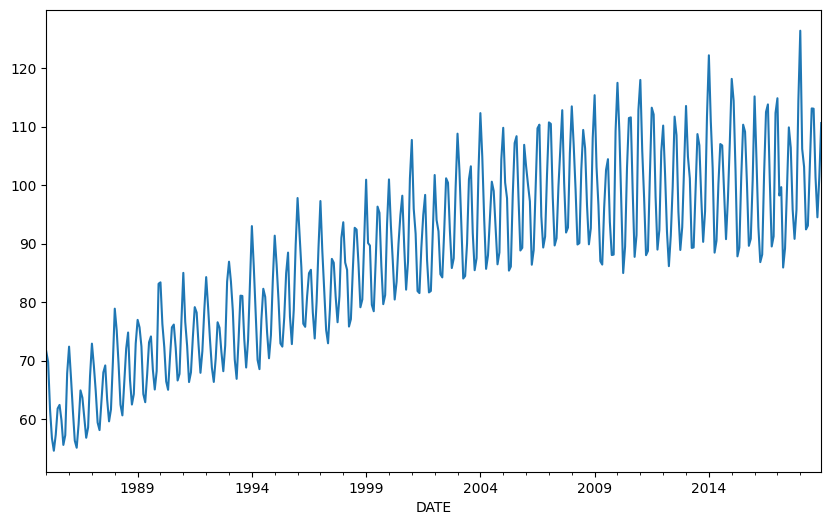

In [8]:
df['producao'].plot(figsize=(10,6))

<Figure size 800x600 with 0 Axes>

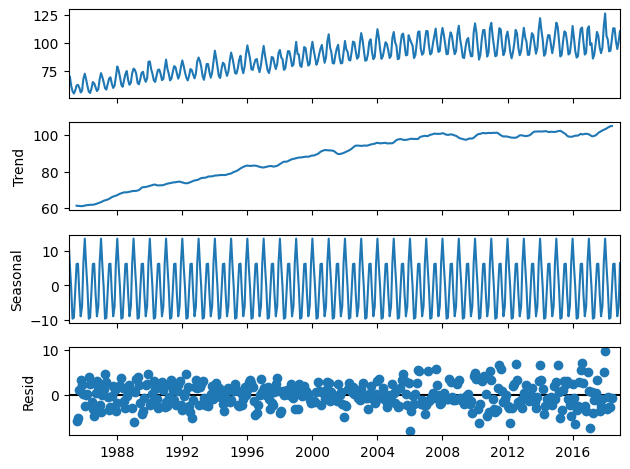

In [9]:
# Decomposição sazonal
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df)

fig = plt.figure(figsize=(8,6))
fig = resultado.plot()


In [10]:
# Teste de estacionalidade 
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['producao'].dropna())
print(f"Teste ADF: {result[0]}")
print(f"p-valor: {result[1]}")


Teste ADF: -2.252399047046608
p-valor: 0.18777984601967346


In [11]:
df.head()

,producao
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [12]:
df.diff().head()

,producao
DATE,
1985-01-01,NaN
1985-02-01,-1.8050
1985-03-01,-8.1080
1985-04-01,-4.9311
1985-05-01,-2.1314


In [13]:
# TParametro diff vai trazer o valor da linha abaixo e trazer para cima 
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['producao'].diff().dropna())
print(f"Teste ADF: {result[0]}")
print(f"p-valor: {result[1]}")

Teste ADF: -7.450892277526375
p-valor: 5.674569955854434e-11


In [14]:
# Escolher o melhor parametro 


In [15]:
fit_arima = auto_arima(df, d=1, start_p= 1, start_q = 1, max_p = 3, max_q=3,
                       seasonal = True,
                       m=6,
                       D=1,
                       start_P=1,
                       max_P=2,
                       information_criterion="aic",
                       trace=True,
                       error_action="ignore",
                       stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1968.148, Time=0.41 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2064.883, Time=0.29 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1928.298, Time=0.47 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1868.200, Time=0.97 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=0.80 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=0.38 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=0.56 sec
 ARIMA(1,1,0)(1,1,2)[6]             : AIC=1936.850, Time=1.27 sec
 ARIMA(2,1,1)(1,1,2)[6]             : AIC=1868.120, Time=1.55 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1

In [16]:
# Teste 
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,2,6))
resultado_samirax= model.fit()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
resultado_samirax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Fri, 20 Sep 2024   AIC                           1866.400
Time:                                        10:20:45   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.064      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.181      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Predict 12 dias atrás
predicoes = resultado_samirax.get_prediction(start=-12)
predicao_media = predicoes.predicted_mean

In [19]:
# Intervalo de confiança
intervalo_confianca= predicoes.conf_int()
limite_abaixo = intervalo_confianca.iloc[:,0]
limite_acima = intervalo_confianca.iloc[:,1]

limite_abaixo[0], limite_acima[0]

C:\Users\User\AppData\Local\Temp\ipykernel_23228\3449337999.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_abaixo[0], limite_acima[0]


(115.14474798330669, 124.45517785857372)

In [20]:
predicao_media[0]

C:\Users\User\AppData\Local\Temp\ipykernel_23228\4088268170.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicao_media[0]


119.7999629209402

In [21]:
datas_previsao= np.asanyarray(predicao_media.index)
datas = np.asanyarray(df.index)

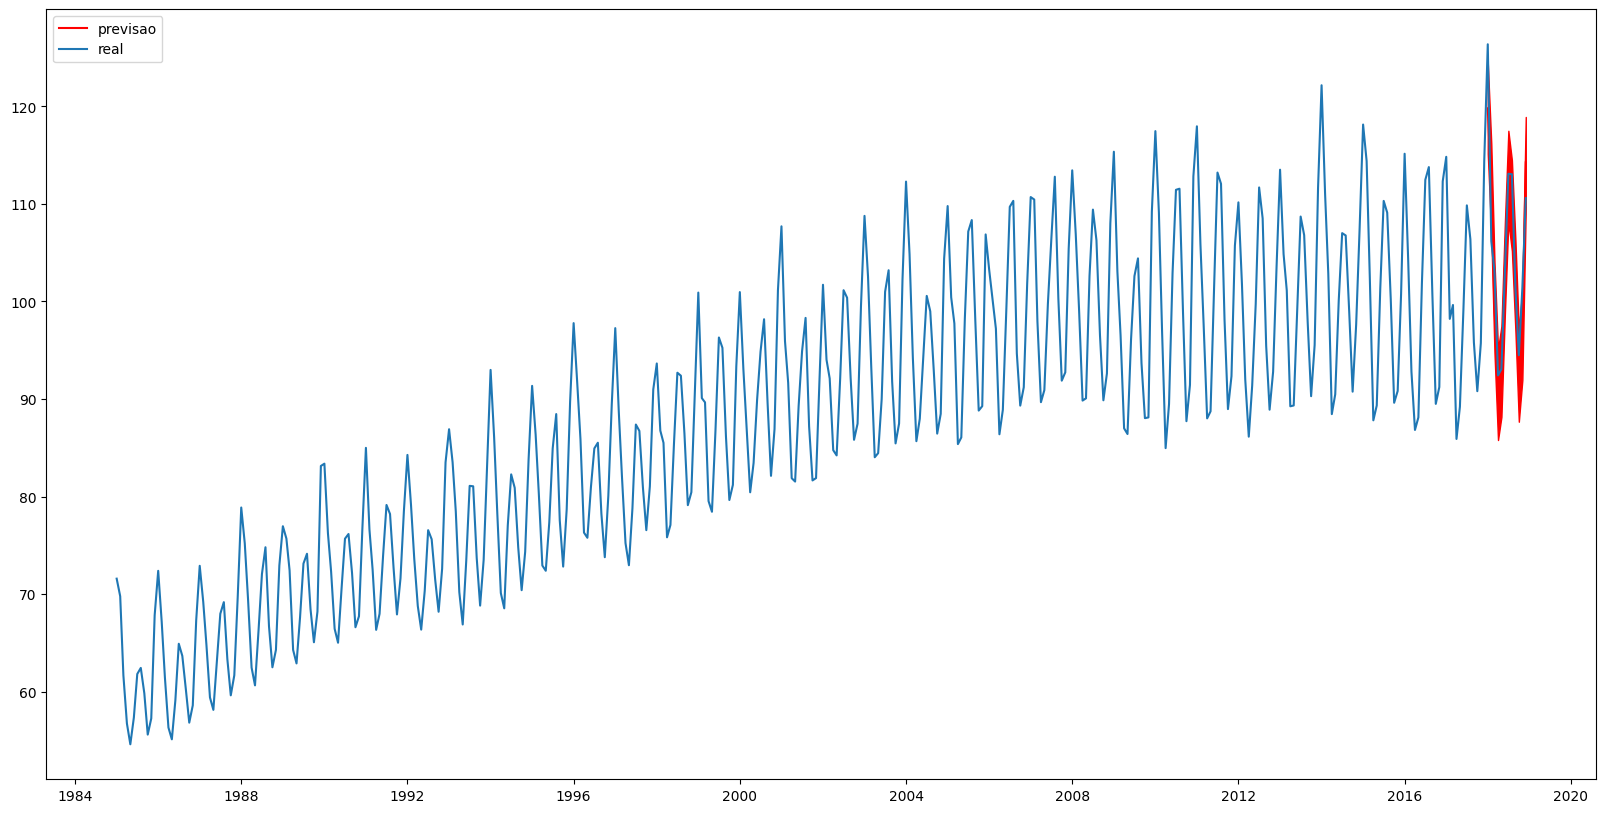

In [22]:
plt.figure(figsize=(20,10))
plt.plot(datas_previsao, predicao_media.values,color = "red",label = 'previsao')
plt.fill_between(datas_previsao, limite_abaixo,limite_acima,color="red")
plt.plot(datas, df.values, label="real")
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df[-12:].values, predicao_media.values)
print(mae)

2.7071206701063253


In [24]:
# Forecast
forecast = resultado_samirax.get_forecast(steps=12)
forecast_medio= forecast.predicted_mean
forecast_medio.size

12

In [25]:
# Intervalo de confiança
intervalo_confianca_forecast= forecast.conf_int()
intervalor_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalor_abaixo_f[10], intervalo_acima_f[10]

C:\Users\User\AppData\Local\Temp\ipykernel_23228\197944449.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intervalor_abaixo_f[10], intervalo_acima_f[10]


(91.38813142795122, 103.10930757058817)

In [26]:
forecast_medio[10]

C:\Users\User\AppData\Local\Temp\ipykernel_23228\459763208.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_medio[10]


97.2487194992697

In [27]:
datas_forecast = np.asanyarray(forecast_medio.index)
pred_dates=np.asanyarray(predicao_media.index)

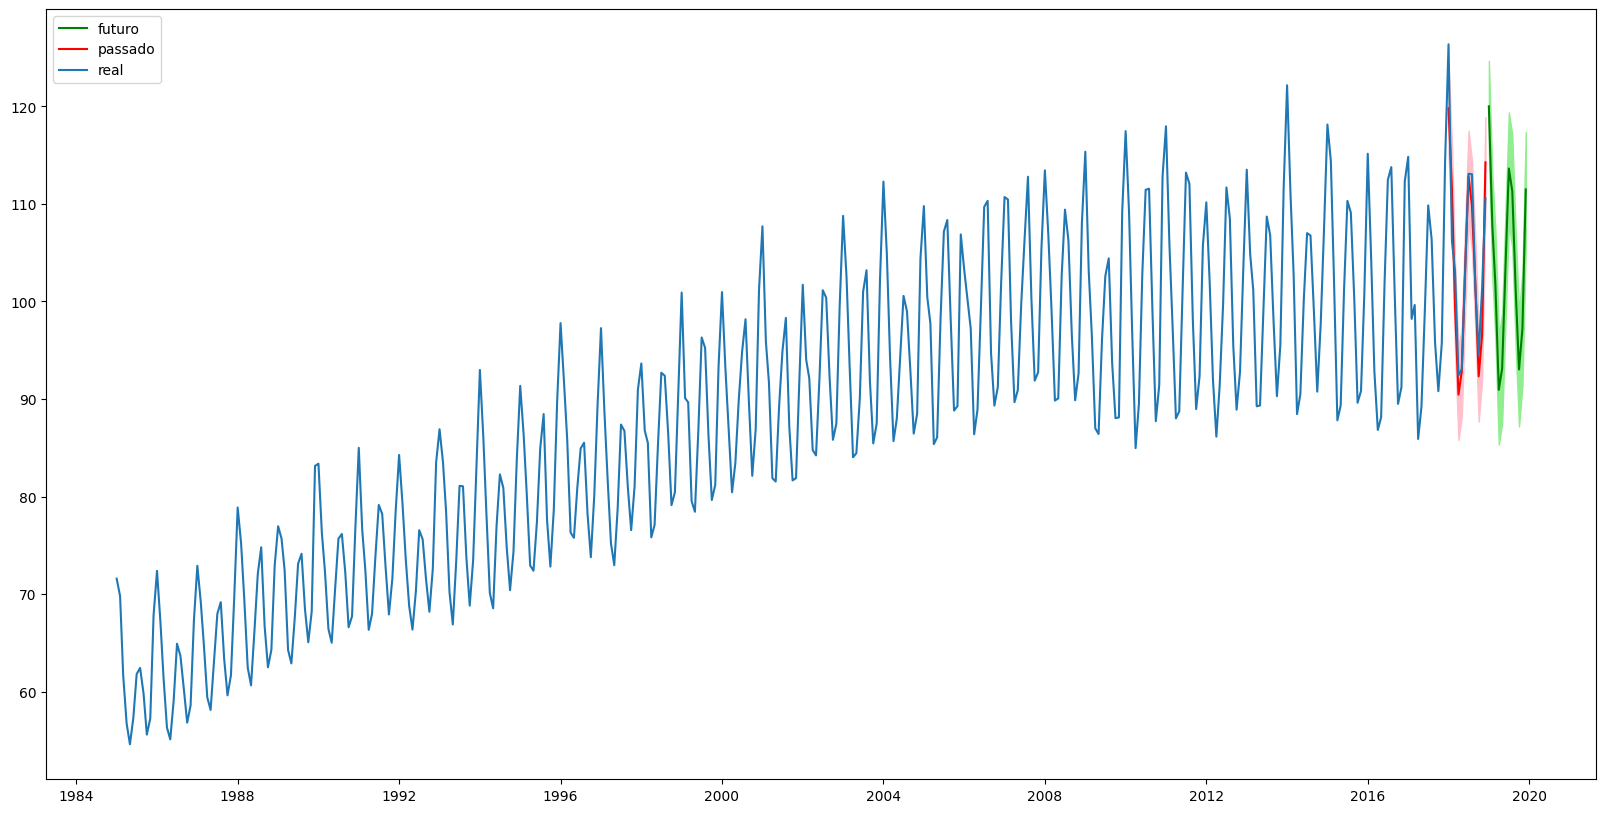

In [28]:
dates = np.asanyarray(df.index)
plt.figure(figsize=(20,10))
plt.plot(datas_forecast,forecast_medio.values,color = "green", label="futuro")
plt.fill_between(datas_forecast, intervalor_abaixo_f,intervalo_acima_f, color="lightgreen")

plt.plot(datas_previsao,predicao_media.values, color="red", label = "passado")
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color = "pink")

plt.plot(dates, df.values, label = "real")
plt.legend(loc="upper left")

### 428. Series Temporais - SARIMAX com Variáveis Exógenas
<h1>Séries Temporais com Variáveis Exógenas</h1><h2>Introdução</h2><ul><li>Após exercício sobre modelos ARIMA e SARIMAX, será trabalhada uma base de dados diferente</li><li>Serão incluídas mais variáveis exógenas que influenciam o modelo</li></ul><h2>Base de Dados</h2><ul><li>Sobre valores e ações da Apple</li><li>Contém: data, preço de abertura, preço máximo, preço mínimo, preço de fechamento, volume de ações</li><li>Criada variável com média entre preço máximo e mínimo (target)</li></ul><h2>Pré-processamento</h2><ul><li>Dados transformados:<ul><li>Média trazida para linha seguinte</li><li>Excluídos valores nulos</li><li>Datas transformadas para dateTime</li><li>Dados normalizados com MinMaxScalar</li></ul></li><li>Divisão da base em conjuntos de treino e teste</li></ul><h2>Modelos</h2><ul><li>AutoARIMA para encontrar melhores parâmetros</li><li>Modelo SARIMAX para treino<ul><li>Utiliza variáveis exógenas</li></ul></li><li>Previsões e avaliação do erro (MSE)</li></ul><h2>Conclusões</h2><ul><li>Modelo se ajustou muito bem aos dados</li><li>Variáveis exógenas melhoram o modelo</li><li>Próximo passo: Séries Temporais com Machine Learning</li></ul>


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
dataset = pd.read_csv('price.csv')
dataset.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000


In [31]:
# Criando a média
dataset["Mean"]= (dataset["Low"]+ dataset["High"])/2
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393


In [32]:
# Média por dia atual
steps = -1
dataset_for_prediction = dataset.copy()
dataset_for_prediction["Actual"] = dataset_for_prediction["Mean"].shift(steps)
dataset_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964,3.327143


In [33]:
dataset_for_prediction = dataset_for_prediction.dropna()

In [34]:
# Date time
dataset_for_prediction["Date"] = pd.to_datetime(dataset_for_prediction["Date"])
# Transformando em index
dataset_for_prediction.index = dataset_for_prediction["Date"]

<Axes: xlabel='Date'>

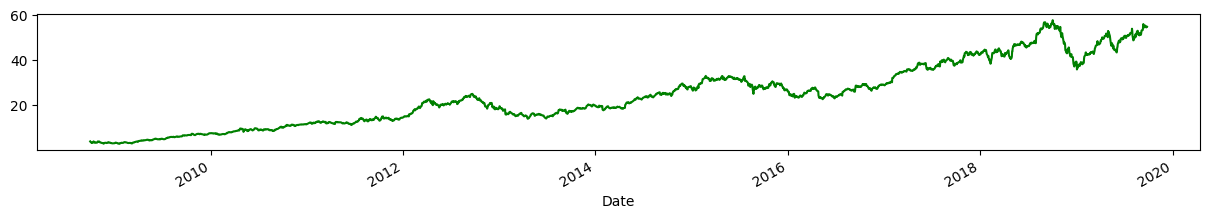

In [35]:
# Análise gráfica
dataset_for_prediction["Mean"].plot(color="green", figsize=(15,2))

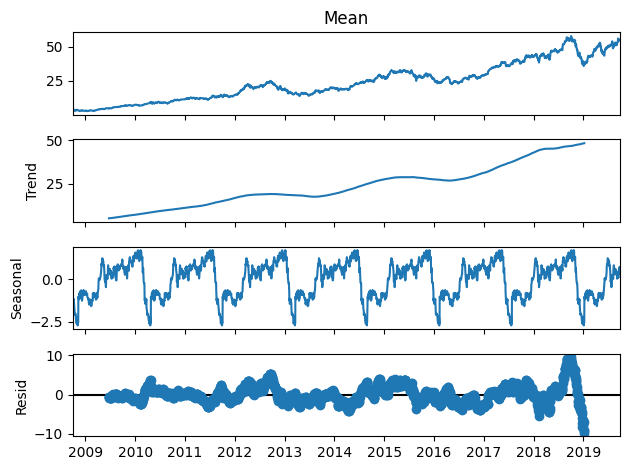

In [36]:
# Teste de sazonalidade
import statsmodels.api as sm
sd=sm.tsa.seasonal_decompose(dataset_for_prediction["Mean"], model="add", period=365)
fig=sd.plot()
plt.show()

In [37]:
# Separando a base em treino em teste 
from sklearn.preprocessing import MinMaxScaler
sc_in= MinMaxScaler(feature_range=(0,1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[["Low","High", "Open","Close","Volume","Adj Close", "Mean"]])
scaled_input= pd.DataFrame(scaled_input)
X = scaled_input


In [38]:
sc_out= MinMaxScaler(feature_range=(0,1))
scaled_output = sc_out.fit_transform(dataset_for_prediction[["Actual"]])
scaled_output= pd.DataFrame(scaled_output)
y = scaled_output

In [39]:
# Renomeando colunas 
X.rename(columns={0:"Low", 1:"High", 2:"Open",3:"Close", 4:"Volume", 5:"Adj Close", 6:"Mean"}, inplace=True)
X.index=dataset_for_prediction.index
X.head(2)

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.01762,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.01248,0.015763


In [40]:
y.rename(columns={0:"Preco_acao"}, inplace=True)
y.index=dataset_for_prediction.index
y.head(2)

,Preco_acao
Date,
2008-10-01,0.015763
2008-10-02,0.013284


In [41]:
# Train e teste
train_size= int(len(dataset)*0.7)
test_size= int(len(dataset)) - train_size
train_X, train_y = X[:train_size].dropna(),y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(),y[train_size:].dropna()

In [42]:
from pmdarima.arima import auto_arima 

In [43]:
# Variáveis exogenous
step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action="ignore", 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15130.709, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15077.042, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15127.374, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15132.095, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15075.928, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15130.986, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15130.275, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15131.797, Time=0.24 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.780 seconds


In [44]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1936
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7569.047
Date:                Fri, 20 Sep 2024   AIC                         -15132.095
Time:                        10:20:50   BIC                         -15115.391
Sample:                             0   HQIC                        -15125.952
                               - 1936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.414      0.157    -7.4e-05       0.000
ma.L1          0.1723      0.013     13.155      0.000       0.147       0.198
sigma2      2.339e-05   3.08e-07     75.974      0.000    2.28e-05     2.4e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9198.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
train_X= np.array(train_X)
train_y = np.array(train_y)

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_y,
                exog=train_X,
                order =(0,1,1),
                enforce_invertibility=False, enforce_stationarity=False)

In [47]:
results = model.fit()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
predicoes = results.predict(start = train_size, end=train_size+test_size+(steps)-1,exog=test_X)

In [49]:
act = pd.DataFrame(scaled_output.iloc[train_size:,0])

In [50]:
act.index = test_X.index

In [51]:
# Verificando se o modelo se ajustou bem com a serie temporal 
predicoes=pd.DataFrame(predicoes)
predicoes.reset_index(drop=True, inplace=True)
predicoes.index=test_X.index
predicoes["Actual"]=act["Preco_acao"]
predicoes.rename(columns={0:"Pred"},inplace=True)


<Axes: xlabel='Date'>

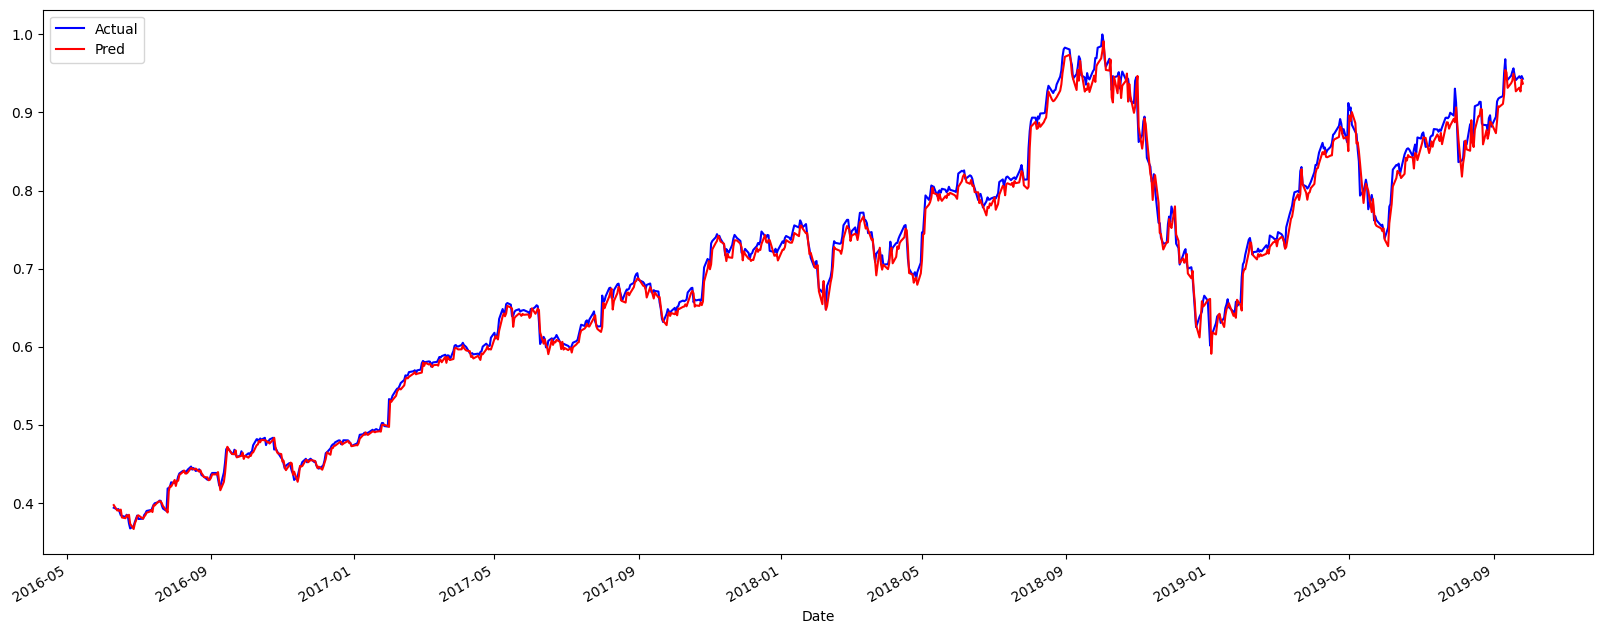

In [52]:
predicoes["Actual"].plot(figsize=(20,8),legend=True, color = "blue")
predicoes["Pred"].plot(legend=True, color="red", figsize=(20,8))

In [53]:
# Tirando erro médio
from statsmodels.tools.eval_measures import mse
error = mse(predicoes["Pred"], predicoes["Actual"])
error

0.00012945238417055751

### 429.Series Temporais - Prática com Machine Learning
<h1>Tema central: Implementação de séries temporais com Machine Learning</h1><h2>Comparação entre Arima e Machine Learning</h2><ul><li>Arima<ul><li>Prevê vários dias à frente ou atrás</li><li>Consegue identificar a sequência temporal (1o dia, 2o dia, etc)</li></ul></li><li>Machine Learning<ul><li>Prevê apenas 1 unidade à frente</li><li>Não consegue identificar a sequência temporal<ul><li>Precisa fazer um &quot;shift&quot; nos dados para conseguir prever o dia seguinte</li></ul></li></ul></li></ul><h2>Implementação com XGBoost</h2><ul><li>Divide os dados em treino e validação</li><li>Faz um &quot;shift&quot; em cada conjunto, para ter os targets (dia seguinte)</li><li>Treina o modelo XGBRegressor</li><li>Faz predições no conjunto de validação</li><li>Calcula o erro absoluto médio (MAE)<ul><li>Teve erro de 3.5, um pouco pior que o Arima</li></ul></li></ul><h2>Desafio</h2><ul><li>Tentar tunar os hiperparâmetros do XGBoost para melhorar o desempenho</li><li>Ver se é possível superar o desempenho do Arima</li></ul>

In [54]:
from xgboost import XGBRegressor

In [55]:
treino = df.loc[df.index < "2016-12-31"]
validacao = df.loc[df.index > "2016-12-31"]

treino.shape, validacao.shape

((384, 1), (24, 1))

In [56]:
treino.head()

,producao
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [57]:
# Tentar prever o dia de amanhã 
treino["target"]= treino["producao"].shift(-1)
treino.head()

C:\Users\User\AppData\Local\Temp\ipykernel_23228\1544842437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino["target"]= treino["producao"].shift(-1)


,producao,target
DATE,,
1985-01-01,71.5920,69.7870
1985-02-01,69.7870,61.6790
1985-03-01,61.6790,56.7479
1985-04-01,56.7479,54.6165
1985-05-01,54.6165,57.3509


In [58]:
# Tirar os números
treino.dropna(inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_23228\71064072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino.dropna(inplace=True)


In [59]:
validacao["target"]= validacao["producao"].shift(-1)
validacao.head()

C:\Users\User\AppData\Local\Temp\ipykernel_23228\194888254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao["target"]= validacao["producao"].shift(-1)


,producao,target
DATE,,
2017-01-01,114.8282,98.2191
2017-02-01,98.2191,99.6408
2017-03-01,99.6408,85.9106
2017-04-01,85.9106,89.2053
2017-05-01,89.2053,99.1945


In [60]:
validacao.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_23228\2352323553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao.dropna(inplace=True)


In [61]:
x_treino = treino.loc[:,['producao']].values
y_treino = treino.loc[:, ['target']].values
X_validacao = validacao.loc[:, ['producao']].values
y_validacao = validacao.loc[:, ["target"]].values

In [62]:
modelo_xgba = XGBRegressor()
modelo_xgba.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
validacao.iloc[0]

producao    114.8282
target       98.2191
Name: 2017-01-01 00:00:00, dtype: float64

In [64]:
predicao = modelo_xgba.predict(X_validacao)
predicao

array([103.05468 ,  89.6212  , 108.89758 ,  79.16283 ,  93.78335 ,
        99.628296, 101.583725, 110.23003 , 106.858765,  98.68999 ,
       106.858765, 103.05468 , 110.27728 ,  97.96312 , 103.55588 ,
        96.872536,  86.97877 , 105.77548 , 114.146774, 114.146774,
       111.32476 ,  97.687325, 111.32476 ], dtype=float32)

In [65]:
validacao["pred"]= predicao
validacao.head()

C:\Users\User\AppData\Local\Temp\ipykernel_23228\1878580322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao["pred"]= predicao


,producao,target,pred
DATE,,,
2017-01-01,114.8282,98.2191,103.054680
2017-02-01,98.2191,99.6408,89.621201
2017-03-01,99.6408,85.9106,108.897583
2017-04-01,85.9106,89.2053,79.162827
2017-05-01,89.2053,99.1945,93.783348


In [66]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X_validacao,predicao)

6.86671642747962

### 430. Series Temporais - Exercício
<h1>Séries Temporais</h1><h2>Objetivo</h2><ul><li>Construir uma série temporal utilizando o algoritmo Holt-Winters</li><li>Avaliar o desempenho do modelo calculando o erro médio quadrático (MSE)</li></ul><h2>Tarefa</h2><ul><li>Utilizar a base de dados fornecida</li><li>Aplicar o algoritmo Holt-Winters para fazer previsões</li><li>Plotar gráficos para analisar visualmente</li><li>Calcular o erro médio quadrático no final</li></ul><h2>Técnicas</h2><ul><li>Algoritmo Holt-Winters para suavização exponencial</li><li>Análise gráfica de séries temporais</li><li>Cálculo estatístico do erro médio quadrático</li></ul><h2>Expectativas</h2><ul><li>Colocar em prática os conhecimentos de séries temporais</li><li>Entender na prática o funcionamento dos algoritmos</li><li>Avaliar criticamente o desempenho dos modelos</li><li>Aplicar as técnicas aprendidas em aula</li></ul><p>O vídeo passa uma tarefa prática para os alunos aplicarem os conhecimentos de séries temporais, utilizando dados reais, modelos como Holt-Winters e medidas de erro como o MSE. O objetivo é consolidar o aprendizado teórico por meio de uma experiência hands-on.</p>

### 431. Series Temporais - Gabarito
<h1>Implementando um modelo SARIMAX</h1><h2>Importando bibliotecas</h2><ul><li>Pandas</li><li>NumPy</li><li>Matplotlib</li><li>StatsModels</li></ul><h2>Lendo os dados</h2><ul><li>Lendo arquivo Excel com dados de temperatura</li><li>Transformando coluna em float</li><li>Ordenando índice com sort_index</li></ul><h2>Análise exploratória</h2><ul><li>Tendência de alta com picos e vales</li><li>Sazonalidade presente</li><li>Resíduos próximos da média</li></ul><h2>Teste de estacionariedade</h2><ul><li>Teste ADF</li><li>p-valor &lt; 5% -&gt; série estacionária</li></ul><h2>Treinando modelo SARIMAX</h2><ul><li>Utilizando auto_arima para identificar melhores parâmetros</li><li>Treinando modelo com parâmetros identificados</li></ul><h2>Fazendo previsões</h2><ul><li>Prevendo os próximos 60 dias</li><li>Plotando previsões com intervalos de confiança</li><li>Erro quadrático médio de 3.01</li></ul><h2>Próximos passos</h2><ul><li>Implementar em modelos de machine learning</li><li>Comparar métricas de erro</li><li>Fazer benchmarking</li></ul>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.arima.model import ARIMA

In [2]:
from pmdarima.arima import auto_arima

In [3]:
# vamos importar a base de produção de energia elétrica
df = pd.read_excel('temperature.xlsx', index_col='Date', parse_dates=True)
df.head()

,Daily minimum temperatures
Date,
1981-01-01 00:00:00,20.7
1981-02-01 00:00:00,17.9
1981-03-01 00:00:00,18.8
1981-04-01 00:00:00,14.6
1981-05-01 00:00:00,15.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 1981-01-01 00:00:00 to 12/31/1990
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0+ KB


In [5]:
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 1981-01-01 00:00:00 to 12/31/1990
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0+ KB


In [7]:
df.head

<bound method NDFrame.head of                      Daily minimum temperatures
Date                                           
1981-01-01 00:00:00                        20.7
1981-02-01 00:00:00                        17.9
1981-03-01 00:00:00                        18.8
1981-04-01 00:00:00                        14.6
1981-05-01 00:00:00                        15.8
...                                         ...
12/27/1990                                 14.0
12/28/1990                                 13.6
12/29/1990                                 13.5
12/30/1990                                 15.7
12/31/1990                                 13.0

[3647 rows x 1 columns]>

<Axes: xlabel='Date'>

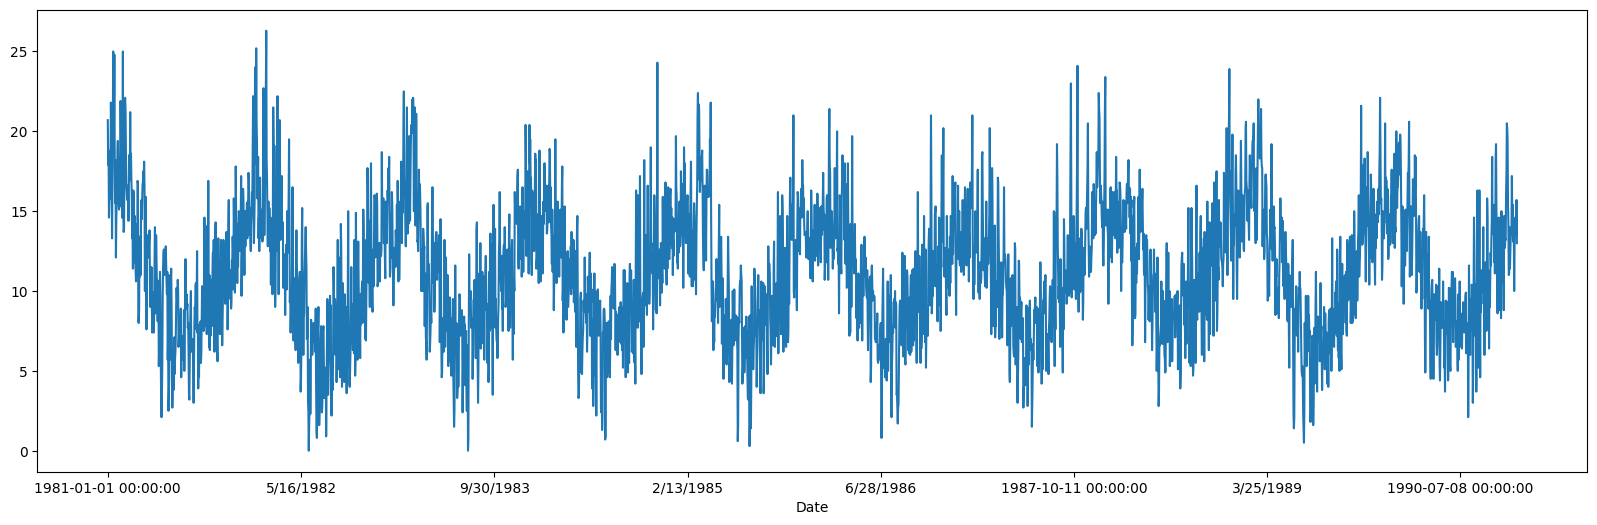

In [9]:
df['Daily minimum temperatures'].plot(figsize=(20,6))

In [10]:
df.head()

,Daily minimum temperatures
Date,
1981-01-01 00:00:00,20.7
1981-02-01 00:00:00,17.9
1981-03-01 00:00:00,18.8
1981-04-01 00:00:00,14.6
1981-05-01 00:00:00,15.8


In [11]:
df.index.min(), df.index.max()

('1/13/1981', '9/30/1990')

In [12]:
df.sort_index(inplace=True)

<Figure size 800x600 with 0 Axes>

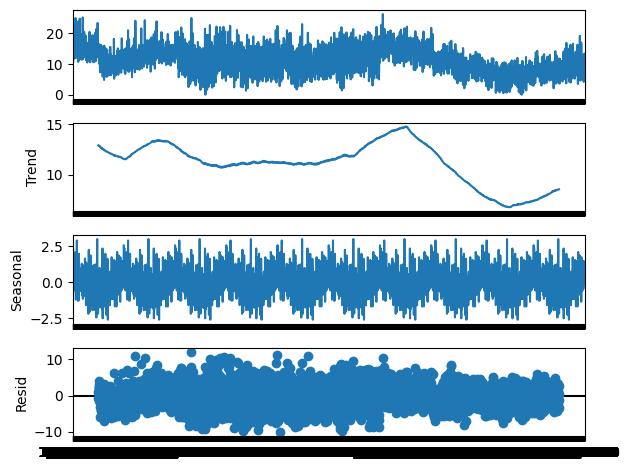

In [13]:
# Primeiro, vamos decompor a série pra avaliar tendência
# Sazonalidade e resíduo
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df, model="add",period=365)

fig = plt.figure(figsize=(8, 6))  
fig = resultado.plot()

In [14]:
# Teste de estacionariedade. 
# A hipótese nula é que a série não é estacionária
# Ou seja, se o p-valor for menor que 0,05, rejeitamos
# que a série não é estacionária. Caso seja maior, não podemos
# descartar que a série não é estacionária
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Daily minimum temperatures'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-3.1926511703941163
p-valor:0.0204140185237133


In [15]:
# Auto ARIMA nos ajuda a buscar os melhores parâmetros
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True, 
                           m=6, 
                           D=1, 
                           start_P=1, 
                           start_Q=1, 
                           max_P=2, 
                           max_Q=2, 
                           information_criterion='aic',
                           trace=True, 
                           error_action='ignore', 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=18647.626, Time=2.13 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=23045.187, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=20675.953, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=1.31 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=inf, Time=1.80 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=2.05 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=inf, Time=7.66 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=inf, Time=4.10 sec
 ARIMA(1,1,1)(0,1,0)[6]             : AIC=22618.290, Time=0.26 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=inf, Time=2.28 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=4.63 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=inf, Time=7.70 sec
 ARIMA(0,1,1)(1,1,1)[6]             : AIC=18692.755, Time=0.81 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=0.77 sec
 ARIMA(2,1,1)(1,1,1)[6]             : AIC=18643.687, Time=3.26 sec
 ARIMA

In [16]:
# Agora que sabemos os melhores parâmetros, vamos criar um modelo SARIMAX 
# (versão do arima com parametros para sazonalidade)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df,order=(2,1,1))
resultado_sarimax = model.fit()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
# resultados do modelo SARIMAX(2,1,1)
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     Daily minimum temperatures   No. Observations:                 3647
Model:                       SARIMAX(2, 1, 1)   Log Likelihood               -9425.166
Date:                        Fri, 20 Sep 2024   AIC                          18858.331
Time:                                10:59:53   BIC                          18883.137
Sample:                                     0   HQIC                         18867.166
                                       - 3647                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2774      0.017     16.454      0.000       0.244       0.310
ar.L2          0.0820      0.018      4.679      0.000       0.048       0.116
ma.L1         -0.9763      0.004   -239.007      0.000      -0.984      -0.968
sigma2        10.2947      0.222     46.417      0.000       9.860      10.729
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                48.48
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Vamos realizar um "backtesting" com predições de valores dos 12 meses anteriores
predicoes = resultado_sarimax.get_prediction(start=-60)
predicao_media = predicoes.predicted_mean

In [19]:
# intervalo de confiança

intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

C:\Users\User\AppData\Local\Temp\ipykernel_38788\3553688534.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limites_abaixo[0], limites_acima[0]


(2.8385283201763043, 15.415752662042351)

In [20]:
predicao_media[0]

C:\Users\User\AppData\Local\Temp\ipykernel_38788\4088268170.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicao_media[0]


9.127140491109328

In [21]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

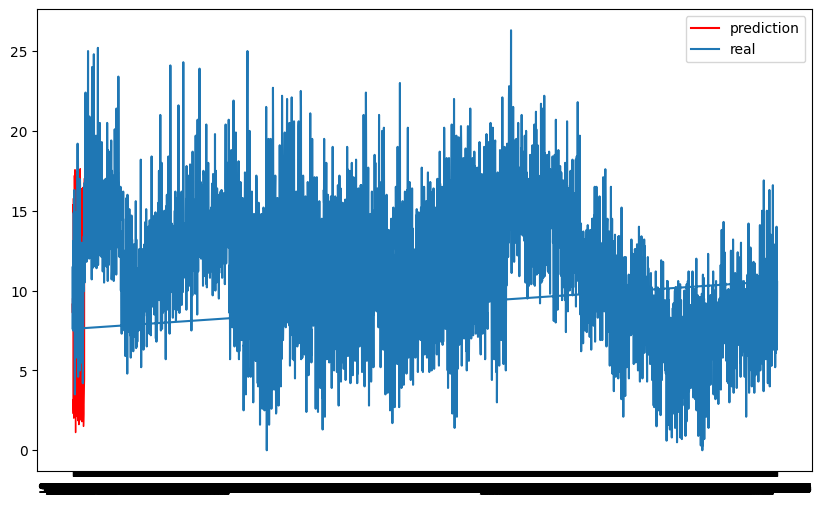

In [22]:
plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_sarima = sqrt(mean_squared_error(df[-60:].values,predicao_media.values))
print(rmse_sarima)

3.485244838132086


In [24]:
## Prevendo com XGBoost
from xgboost import XGBRegressor

In [25]:
treino = df.loc[df.index <= '1988-12-31']
validacao = df.loc[df.index > '1989-01-01']

treino.shape, validacao.shape

((1900, 1), (1747, 1))

In [26]:
treino.index.min(), treino.index.max()

('1/13/1981', '1988-12-12 00:00:00')

In [27]:
validacao.index.min(), validacao.index.max()

('1989-01-01 00:00:00', '9/30/1990')

In [28]:
treino['Daily minimum temperatures']

Date
1/13/1981              16.7
1/13/1982              15.9
1/13/1983              10.5
1/13/1984              16.5
1/13/1985              14.4
                       ... 
1988-12-08 00:00:00     4.8
1988-12-09 00:00:00     6.8
1988-12-10 00:00:00     5.6
1988-12-11 00:00:00    16.9
1988-12-12 00:00:00    14.4
Name: Daily minimum temperatures, Length: 1900, dtype: float64

In [29]:
treino['Daily minimum temperatures'].shift(-1)

Date
1/13/1981              15.9
1/13/1982              10.5
1/13/1983              16.5
1/13/1984              14.4
1/13/1985              12.5
                       ... 
1988-12-08 00:00:00     6.8
1988-12-09 00:00:00     5.6
1988-12-10 00:00:00    16.9
1988-12-11 00:00:00    14.4
1988-12-12 00:00:00     NaN
Name: Daily minimum temperatures, Length: 1900, dtype: float64

In [30]:
treino['target'] = treino['Daily minimum temperatures'].shift(-1)
treino.head()

C:\Users\User\AppData\Local\Temp\ipykernel_38788\2773583269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino['target'] = treino['Daily minimum temperatures'].shift(-1)


,Daily minimum temperatures,target
Date,,
1/13/1981,16.7,15.9
1/13/1982,15.9,10.5
1/13/1983,10.5,16.5
1/13/1984,16.5,14.4
1/13/1985,14.4,12.5


In [31]:
treino.tail()

,Daily minimum temperatures,target
Date,,
1988-12-08 00:00:00,4.8,6.8
1988-12-09 00:00:00,6.8,5.6
1988-12-10 00:00:00,5.6,16.9
1988-12-11 00:00:00,16.9,14.4
1988-12-12 00:00:00,14.4,NaN


In [32]:
treino = treino.dropna()
treino.tail()

,Daily minimum temperatures,target
Date,,
1988-12-07 00:00:00,7.1,4.8
1988-12-08 00:00:00,4.8,6.8
1988-12-09 00:00:00,6.8,5.6
1988-12-10 00:00:00,5.6,16.9
1988-12-11 00:00:00,16.9,14.4


In [33]:
validacao['target'] = validacao['Daily minimum temperatures'].shift(-1)
validacao.head()

C:\Users\User\AppData\Local\Temp\ipykernel_38788\148610262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao['target'] = validacao['Daily minimum temperatures'].shift(-1)


,Daily minimum temperatures,target
Date,,
1989-01-01 00:00:00,14.3,16.1
1989-01-02 00:00:00,16.1,20.4
1989-01-03 00:00:00,20.4,13.3
1989-01-04 00:00:00,13.3,14.2
1989-01-05 00:00:00,14.2,2.3


In [34]:
validacao.tail()

,Daily minimum temperatures,target
Date,,
9/30/1986,7.8,11.2
9/30/1987,11.2,12.4
9/30/1988,12.4,13.4
9/30/1989,13.4,10.0
9/30/1990,10.0,NaN


In [35]:
validacao = validacao.dropna()
validacao.tail()

,Daily minimum temperatures,target
Date,,
9/30/1985,7.2,7.8
9/30/1986,7.8,11.2
9/30/1987,11.2,12.4
9/30/1988,12.4,13.4
9/30/1989,13.4,10.0


In [36]:
X_treino = treino.loc[:, ['Daily minimum temperatures']].values
y_treino = treino.loc[:, ['target']].values
X_validacao = validacao.loc[:, ['Daily minimum temperatures']].values
y_validacao = validacao.loc[:, ['target']].values

X_treino.shape, y_treino.shape, X_validacao.shape, y_validacao.shape

((1899, 1), (1899, 1), (1746, 1), (1746, 1))

In [37]:
modelo_xgba = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
modelo_xgba.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
validacao.iloc[0]

Daily minimum temperatures    14.3
target                        16.1
Name: 1989-01-01 00:00:00, dtype: float64

In [39]:
predicao = modelo_xgba.predict(X_validacao)
predicao

array([15.54563 , 14.623936, 13.401586, ..., 12.525862, 11.405084,
       13.15448 ], dtype=float32)

In [40]:
validacao["pred"] = predicao
validacao.head()

,Daily minimum temperatures,target,pred
Date,,,
1989-01-01 00:00:00,14.3,16.1,15.545630
1989-01-02 00:00:00,16.1,20.4,14.623936
1989-01-03 00:00:00,20.4,13.3,13.401586
1989-01-04 00:00:00,13.3,14.2,13.582238
1989-01-05 00:00:00,14.2,2.3,12.617664


In [41]:
mean_squared_error(X_validacao, predicao)

7.155964023357147